Targets reached at depth 0 :
          0
OnGreen   ?
OnYellow  ?
OnRed     ?
Daytime   ?
OnOff     ?


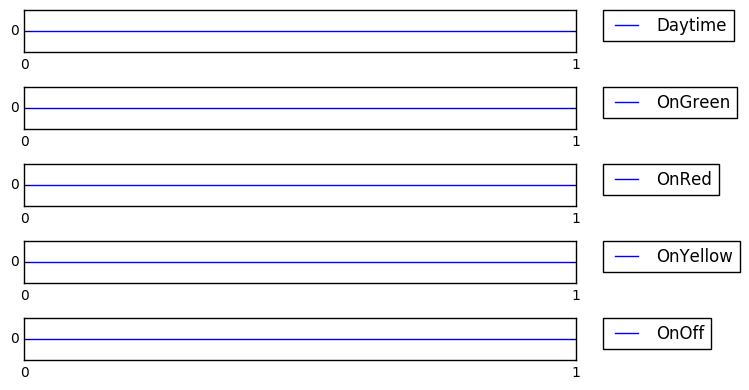

Targets reached at depth 1 :
              0     1
OnGreen       ?     ?
OnYellow  false  true
OnRed         ?     ?
Daytime   false     ?
OnOff         ?     ?


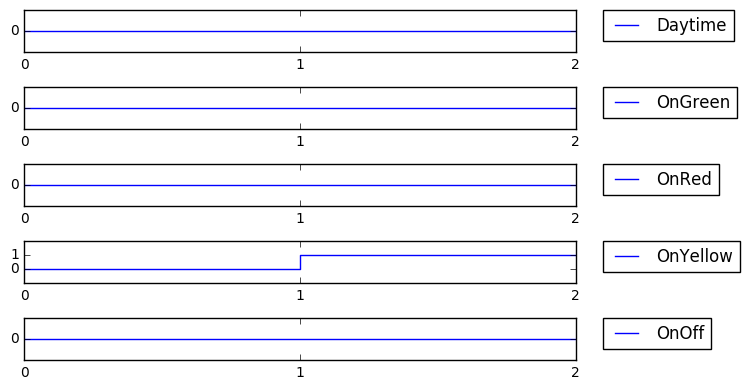

Targets reached at depth 2 :
          0      1     2
OnGreen   ?      ?     ?
OnYellow  ?  false  true
OnRed     ?      ?     ?
Daytime   ?  false     ?
OnOff     ?      ?     ?


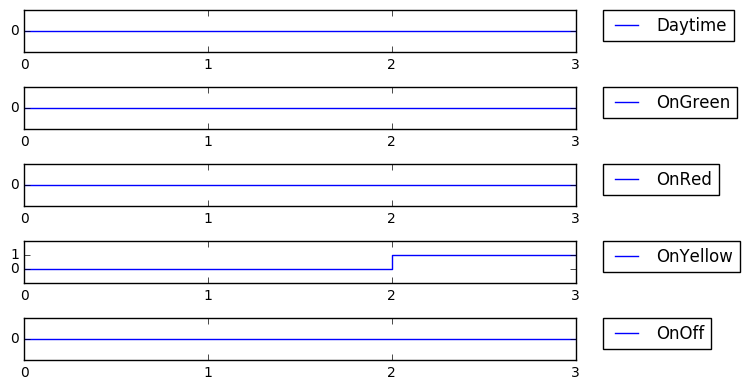

Targets reached at depth 3 :
              0      1      2      3
OnGreen       ?      ?  false   true
OnYellow  false   true      ?      ?
OnRed         ?  false   true  false
Daytime   false   true   true      ?
OnOff         ?      ?      ?      ?


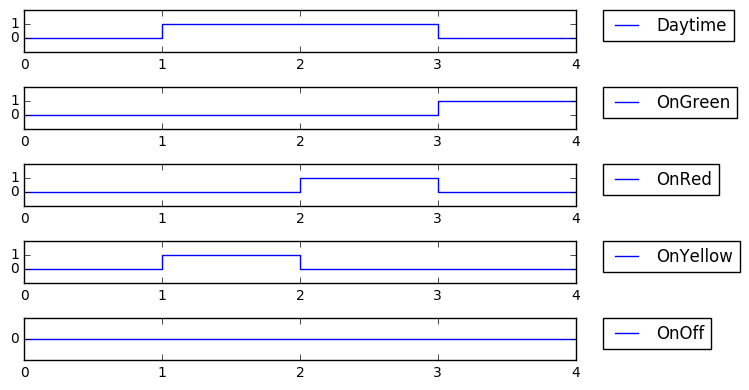

In [1]:
import intrepyd as ip
import intrepyd.plots
from intrepyd.engine import EngineResult

# The translated SCR problem
import traffic_light

ctx = ip.Context()

myTrafficLight = traffic_light.SimulinkCircuit(ctx, 'MyTrafficLight')
myTrafficLight.mk_circuit()

lightOut = myTrafficLight.outputs['traffic_light/out']
targetGreen = ctx.mk_eq(lightOut, myTrafficLight.nets['traffic_light/Green'])
targetYellow = ctx.mk_eq(lightOut, myTrafficLight.nets['traffic_light/Yellow'])
targetRed = ctx.mk_eq(lightOut, myTrafficLight.nets['traffic_light/Red'])
targetOff = ctx.mk_eq(lightOut, myTrafficLight.nets['traffic_light/Off'])

bmc = ctx.mk_bmc()
bmc.add_target(targetGreen)
bmc.add_target(targetYellow)
bmc.add_target(targetRed)
bmc.add_target(targetOff)

for depth in range(4):
    bmc.set_current_depth(depth)
    res = bmc.reach_targets()
    if res == EngineResult.REACHABLE:
        reachedTargets = bmc.get_last_reached_targets()
        print 'Targets reached at depth', depth, ':'
        for target in reachedTargets:
            trace = bmc.get_last_trace()
        df = trace.get_as_dataframe(ctx.net2name)
        print df
        traceDict = trace.get_as_net_dictionary(ctx.net2name)
        ip.plots.plot_trace_dictionary(traceDict)
    else:
        print 'No target reacheable at depth:', depth
